In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mushrooms = pd.read_csv('datasets/agaricus-lepiota.data')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [4]:
mushrooms.rename(columns={'p': 'edibility', 'p.1': 'odor'}, inplace=True)

In [5]:
mushrooms['edibility'] = mushrooms['edibility'].astype('category')
mushrooms['edibility'] = mushrooms['edibility'].cat.rename_categories({
    'e': 'edible', 'p': 'poisonous'
})

In [6]:
mushrooms['odor'] = mushrooms['odor'].astype('category')
mushrooms['odor'] = mushrooms['odor'].cat.rename_categories({
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
})

In [7]:
mushrooms.head(3)

,edibility,x,s,n,t,odor,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,edible,x,s,y,t,almond,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,edible,b,s,w,t,anise,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,poisonous,x,y,w,t,pungent,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [8]:
pd.crosstab(mushrooms.edibility, mushrooms.odor)

odor,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
edibility,,,,,,,,,
edible,400,0,0,400,0,3408,0,0,0
poisonous,0,192,2160,0,36,120,255,576,576


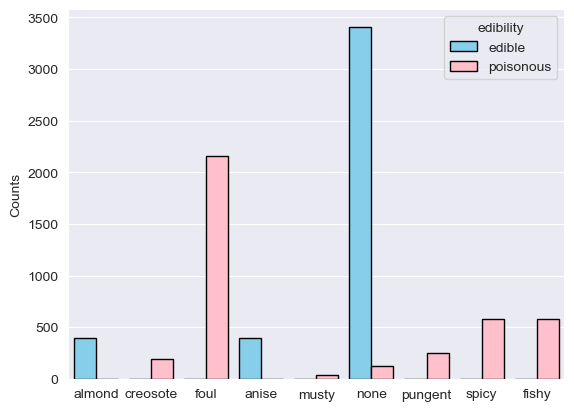

In [9]:
sns.countplot(x='odor', hue='edibility', data=mushrooms, palette=['Skyblue', 'Pink'],
             saturation=1, edgecolor='black')
plt.xlabel('')
plt.ylabel('Counts')
plt.show()

In [10]:
iris = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris.head()

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


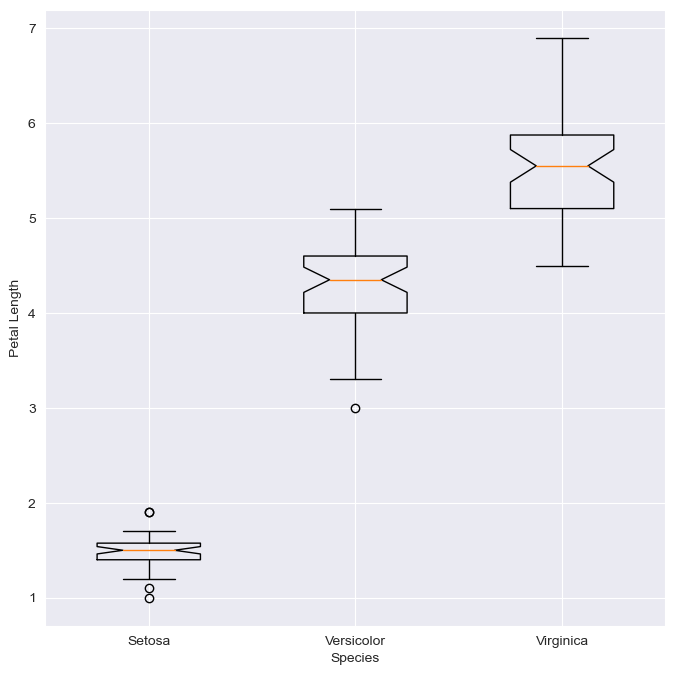

In [11]:
setosa = iris[iris.Species == 'setosa']
versicolor = iris[iris.Species == 'versicolor']
virginica = iris[iris.Species == 'virginica']

plt.figure(figsize=(8, 8))
plt.boxplot([setosa['Petal.Length'], versicolor['Petal.Length'], virginica['Petal.Length']],
            notch=True, widths=(0.5, 0.5, 0.5))
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.show()

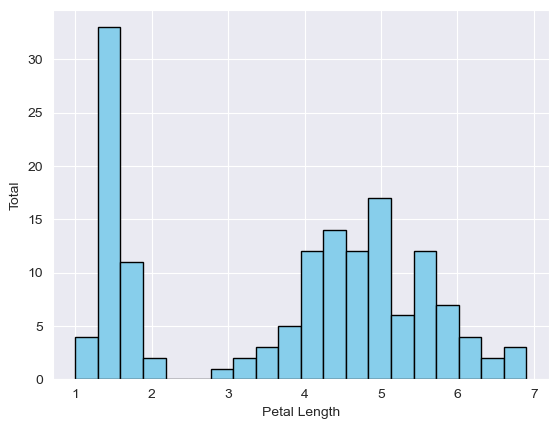

In [12]:
plt.hist(iris['Petal.Length'], bins=20, facecolor='skyblue', edgecolor='black', linewidth=1)
plt.xlabel('Petal Length')
plt.ylabel('Total')
plt.show()

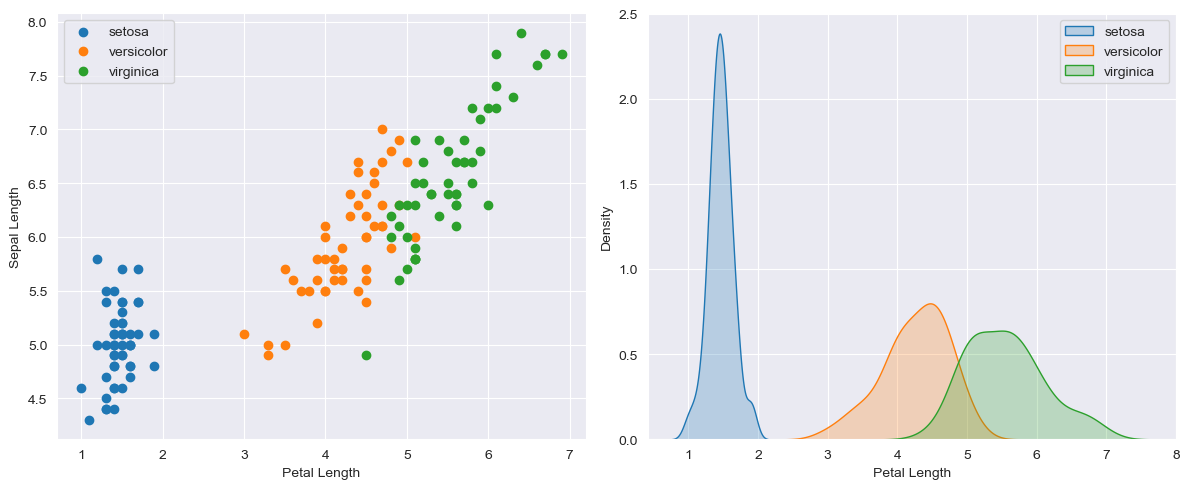

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
iris_grouped = iris.groupby(['Species'])

# scatter plot
for name, group in iris_grouped:
    axes[0].scatter(group['Petal.Length'], group['Sepal.Length'], label=name[0])
axes[0].set_xlabel('Petal Length')
axes[0].set_ylabel('Sepal Length')
axes[0].legend()

# kde plot
for name, data in iris_grouped:
    sns.kdeplot(data=data, x='Petal.Length', ax=axes[1], shade=True, label=name[0])
axes[1].set_xlabel('Petal Length')
axes[1].legend()

plt.tight_layout()
plt.show()